In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../scripts')
from data_loader import DataLoader
from hypothesis_testing import HypothesisTesting

In [3]:
data = pd.read_csv('../data/processed/clean_data.csv', low_memory=False)
data['has_claim'] = np.where(data['totalclaims'] > 0, True, False)
print(f'Data shape: {data.shape}')
print(f'Province unique values: {data["province"].unique()}')
print(f'PostalCode unique count: {data["postalcode"].nunique()}')
print(f'Gender unique values: {data["gender"].unique()}')

Data shape: (837833, 48)
Province unique values: ['Gauteng' 'KwaZulu-Natal' 'Eastern Cape' 'Western Cape' 'Limpopo'
 'North West' 'Free State' 'Mpumalanga' 'Northern Cape']
PostalCode unique count: 850
Gender unique values: ['Male' 'Female']


In [4]:
tester = HypothesisTesting(data)

Data shape after filtering: (837782, 49)


In [7]:
check_cols = ['maritalstatus', 'vehicletype', 'covertype', 'cubiccapacity']
equivalence = tester.check_group_equivalence('province', 'Gauteng', 'KwaZulu-Natal', check_cols)
print('Group Equivalence Check (Gauteng vs. KwaZulu-Natal):')
print(equivalence)

Group Equivalence Check (Gauteng vs. KwaZulu-Natal):
          column         test       p_value
0    vehicletype  Chi-Squared  3.743282e-79
1  cubiccapacity       T-Test  7.186575e-72


In [8]:
results = tester.run_hypothesis_tests()
print('\nHypothesis Test Results:')
print(results)

Gender distribution: {'Male': 783386, 'Female': 54396}

Hypothesis Test Results:
          test    group_a        group_b           metric   p_value  \
0  Chi-Squared    Gauteng  KwaZulu-Natal  claim_frequency  0.003040   
1       T-Test    Gauteng  KwaZulu-Natal   claim_severity  0.000320   
2  Chi-Squared  High Risk       Low Risk  claim_frequency  1.000000   
3  Chi-Squared     Female           Male  claim_frequency  0.000042   
4       T-Test     Female           Male   claim_severity  0.838049   

   p_value_adjusted  
0          0.005066  
1          0.000799  
2          1.000000  
3          0.000211  
4          1.000000  


In [10]:
tester.save_results()
data['margin'] = data['totalpremium'] - data['totalclaims']

Gender distribution: {'Male': 783386, 'Female': 54396}
Results saved to reports/hypothesis_test_results.csv


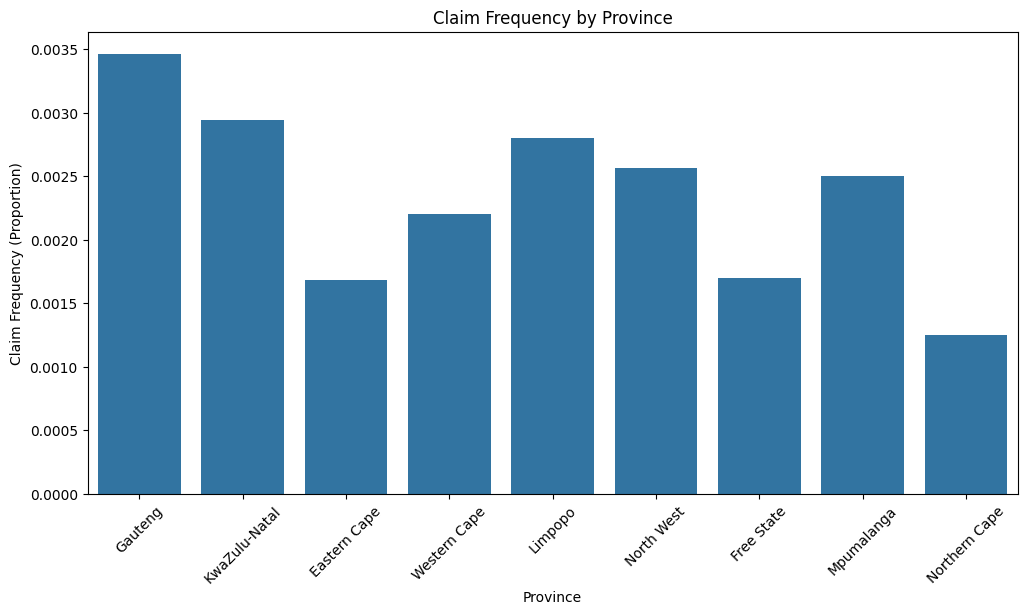

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='province', y='has_claim', data=data, errorbar=None)
plt.title('Claim Frequency by Province')
plt.xlabel('Province')
plt.ylabel('Claim Frequency (Proportion)')
plt.xticks(rotation=45)
plt.savefig('plots/claim_frequency_province.png')
plt.show()